# STA414: HW2 Q2 bcdef

**Date**: February 22, 2021  
**First Name**: Mahrukh  
**Last Name**: Niazi  
**Student Id**: 1003948204

### Q2(b): Figure containing each class mean $\mu_k$ as an image.

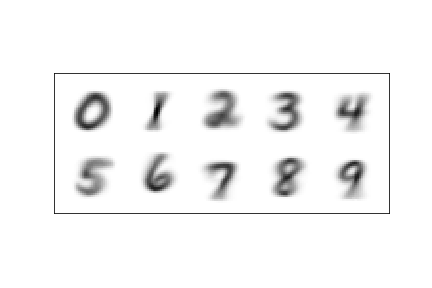

### Q2(c): Report final training and test errors as well as the number of samples used in training.

Number of samples used was N = 10000.

Final training accuracy was 0.8939 = 89.39%.

Final test accuracy was 0.825 = 82.50%.

### Q2(d): Briefly compare the performance of this model to that of logistic regression.

For logistic regression, the final training and test accuracies were 89.43% and 88.10% respectively. For this generative model the final training and test accuracies were 89.39% and 82.50% respectively. Evidently the logistic regression model performed better as the accuracies for both training and test set were higher. This may be because the generative model assumes all the dimensions as independent to one another which is not accurate.

### Q2(e): Using the generative model you trained, generate 10 images from digit 0 and 10 images from digit 3.

 **Generated 10 images from digit 0, generated with `N_data = 10000`:**

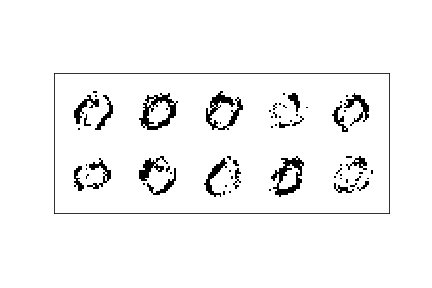

 **Generated 10 images from digit 3, generated with `N_data = 10000`:**

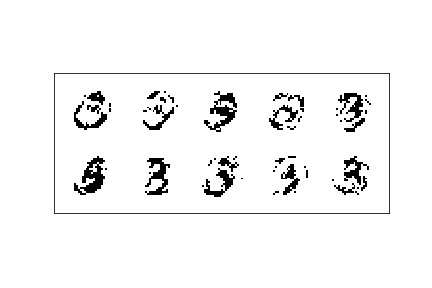

### Q2(f): Code for Q2.

Training accuracy is  0.8939
Test accuracy is  0.825
Number of samples used was 10000


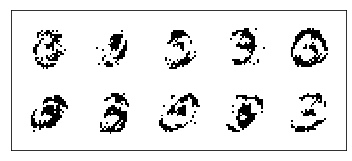

In [1]:
from __future__ import absolute_import
from __future__ import print_function
from future.standard_library import install_aliases

install_aliases()
import numpy as np
from scipy.special import logsumexp
import os
import gzip
import struct
import array
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve


def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def mnist():
    base_url = 'http://yann.lecun.com/exdb/mnist/'

    def parse_labels(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data = struct.unpack(">II", fh.read(8))
            return np.array(array.array("B", fh.read()), dtype=np.uint8)

    def parse_images(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
            return np.array(array.array("B", fh.read()), dtype=np.uint8).reshape(num_data, rows, cols)

    for filename in ['train-images-idx3-ubyte.gz',
                     'train-labels-idx1-ubyte.gz',
                     't10k-images-idx3-ubyte.gz',
                     't10k-labels-idx1-ubyte.gz']:
        download(base_url + filename, filename)

    train_images = parse_images('data/train-images-idx3-ubyte.gz')
    train_labels = parse_labels('data/train-labels-idx1-ubyte.gz')
    test_images = parse_images('data/t10k-images-idx3-ubyte.gz')
    test_labels = parse_labels('data/t10k-labels-idx1-ubyte.gz')

    return train_images, train_labels, test_images[:1000], test_labels[:1000]


def load_mnist(N_data=None):
    partial_flatten = lambda x: np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))
    one_hot = lambda x, k: np.array(x[:, None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels = mnist()
    train_images = (partial_flatten(train_images) / 255.0 > .5).astype(float)
    test_images = (partial_flatten(test_images) / 255.0 > .5).astype(float)
    K_data = 10
    train_labels = one_hot(train_labels, K_data)
    test_labels = one_hot(test_labels, K_data)
    if N_data is not None:
        train_images = train_images[:N_data, :]
        train_labels = train_labels[:N_data, :]

    return train_images, train_labels, test_images, test_labels


def plot_images(images, ax, ims_per_row=5, padding=5, digit_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=None, vmax=None):
    """Images should be a (N_images x pixels) matrix."""
    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = np.min(images.ravel())
    concat_images = np.full(((digit_dimensions[0] + padding) * N_rows + padding,
                             (digit_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], digit_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + digit_dimensions[0]) * row_ix
        col_start = padding + (padding + digit_dimensions[1]) * col_ix
        concat_images[row_start: row_start + digit_dimensions[0],
        col_start: col_start + digit_dimensions[1]] = cur_image
        cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    return cax


def save_images(images, filename, **kwargs):
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)
    plot_images(images, ax, **kwargs)
    fig.patch.set_visible(False)
    ax.patch.set_visible(False)
    plt.savefig(filename)


def train_log_regression(images, labels, learning_rate, max_iter):
    """ Used in Q1
        Inputs: train_images, train_labels, learning rate,
        and max num of iterations in gradient descent
        Returns the trained weights (w/o intercept)"""
    
    N_data, D_data = images.shape
    K_data = labels.shape[1]
    weights = np.zeros((D_data, K_data))

    # YOU NEED TO WRITE THIS PART

    for iter in range(max_iter):

        yi_hat = log_softmax(images, weights)
        grad = np.dot(images.T, np.exp(yi_hat) - labels)
        weights = weights - learning_rate * grad

    w0 = None  # No intercept for log-reg
    return weights, w0

def train_gda(images, labels):
    """ Used in Q2
        Inputs: train_images, train_labels
        Returns the trained weights, the intercept, and D x K class means, 
        and D x D common covariance matrix."""
    N_data, D_data = images.shape
    K_data = labels.shape[1]

    # YOU NEED TO WRITE THIS PART
    

    Nk = np.sum(labels, axis=0)
    Mu =  (np.dot(labels.T, images) / Nk[:,None]).T
    Sigma = [np.eye(D_data)] * K_data
    SigmaB = np.eye(D_data)
    Pi = Nk / N_data

    for k in range(K_data):
        data_white = images - np.array([Mu[:, k], ] * N_data)
        
        Sigma[k] = data_white.T.dot(np.diag(labels[:, k]).dot(data_white)) / Nk[k]
        SigmaB = SigmaB + Sigma[k] * Nk[k]
    
    SigmaB = SigmaB / N_data
    SigmaInv = np.linalg.inv(SigmaB)
    weights = SigmaInv.dot(Mu)
    w0 = np.zeros(K_data)
    
    for k in range(K_data):
        w0[k] = -.5 * SigmaInv.dot(Mu[:, k]).dot(Mu[:, k]) + np.log(Pi[k])

    return weights, w0, Mu, Sigma


def log_softmax(images, weights, w0=None):
    """ Used in Q1 and Q2
        Inputs: images, and weights
        Returns the log_softmax values."""
    if w0 is None: w0 = np.zeros(weights.shape[1])

    # YOU NEED TO WRITE THIS PART

    numerator = np.dot(images, weights) + w0
    denominator = logsumexp(numerator, axis=1)

    return numerator - denominator.reshape(-1, 1)

def cross_ent(train_labels, log_Y):
    """ Used in Q1
        Inputs: log of softmax values and training labels
        Returns the cross entropy."""

    # YOU NEED TO WRITE THIS PART
    # assume vectors
    
    return -np.dot(train_labels, log_Y)

def predict(log_softmax):
    """ Used in Q1 and Q2
        Inputs: matrix of log softmax values
        Returns the predictions"""

    # YOU NEED TO WRITE THIS PART

    return np.argmax(log_softmax, axis=1)


def accuracy(log_softmax, labels):
    """ Used in Q1 and Q2
        Inputs: matrix of log softmax values and 1-of-K labels
        Returns the accuracy based on predictions from log likelihood values"""

    # YOU NEED TO WRITE THIS PART
    N = labels.shape[0]

    ytrue = np.argmax(labels, axis=-1)
    ypred = predict(log_softmax)

    correct = 0

    for i in range(N):
        if ypred[i] == ytrue[i]:
            correct = correct + 1

    return correct / len(ytrue)


def main():
    N_data = 10000  # Num of samples to be used in training
    # Set this to a small number while experimenting.
    # For log reg, finally use the entire training dataset for training (N_data=None).
    # For gda, use as many training samples as your computer can handle.

    train_images, train_labels, test_images, test_labels = load_mnist(N_data)

    # Q2: train gaussian discriminant
    weights, w0, Mu, Sigma = train_gda(train_images, train_labels)
    save_images(Mu.T, 'means.png')
    
    new_digit = 0
    new_images = np.random.multivariate_normal(Mu[:, new_digit], Sigma[0], 10)
    save_images((new_images > .5).astype(float), 'new_images_digit_0.png')
    
    new_digit = 3
    new_images = np.random.multivariate_normal(Mu[:, new_digit], Sigma[0], 10)
    save_images((new_images > .5).astype(float), 'new_images_digit_3.png')

    # evaluation
    log_softmax_train = log_softmax(train_images, weights, w0)
    log_softmax_test = log_softmax(test_images, weights, w0)

    train_accuracy = accuracy(log_softmax_train, train_labels)
    test_accuracy = accuracy(log_softmax_test[:1000], test_labels[:1000])

    print("Training accuracy is ", train_accuracy)
    print("Test accuracy is ", test_accuracy)
    print(f"Number of samples used was {N_data}")


if __name__ == '__main__':
    main()